# The Heat Equation

The heat equation is a partial differential equation that describes how the distribution of heat in a given region changes over time. It is a fundamental equation in the field of heat transfer and is used to model the behavior of temperature in various physical systems.

In simple terms, the heat equation reflects the fact that heat tends to flow from regions of higher temperature to regions of lower temperature. It takes into account how the temperature at a particular point in space changes with respect to time, considering the influence of neighboring points.

The equation is particularly useful in scenarios where temperature distribution is a critical factor, such as in the study of heat conduction through materials, the behavior of fluids, or the thermal characteristics of solids. Solving the heat equation provides insights into how temperature evolves over time and helps predict the thermal behavior of a system.

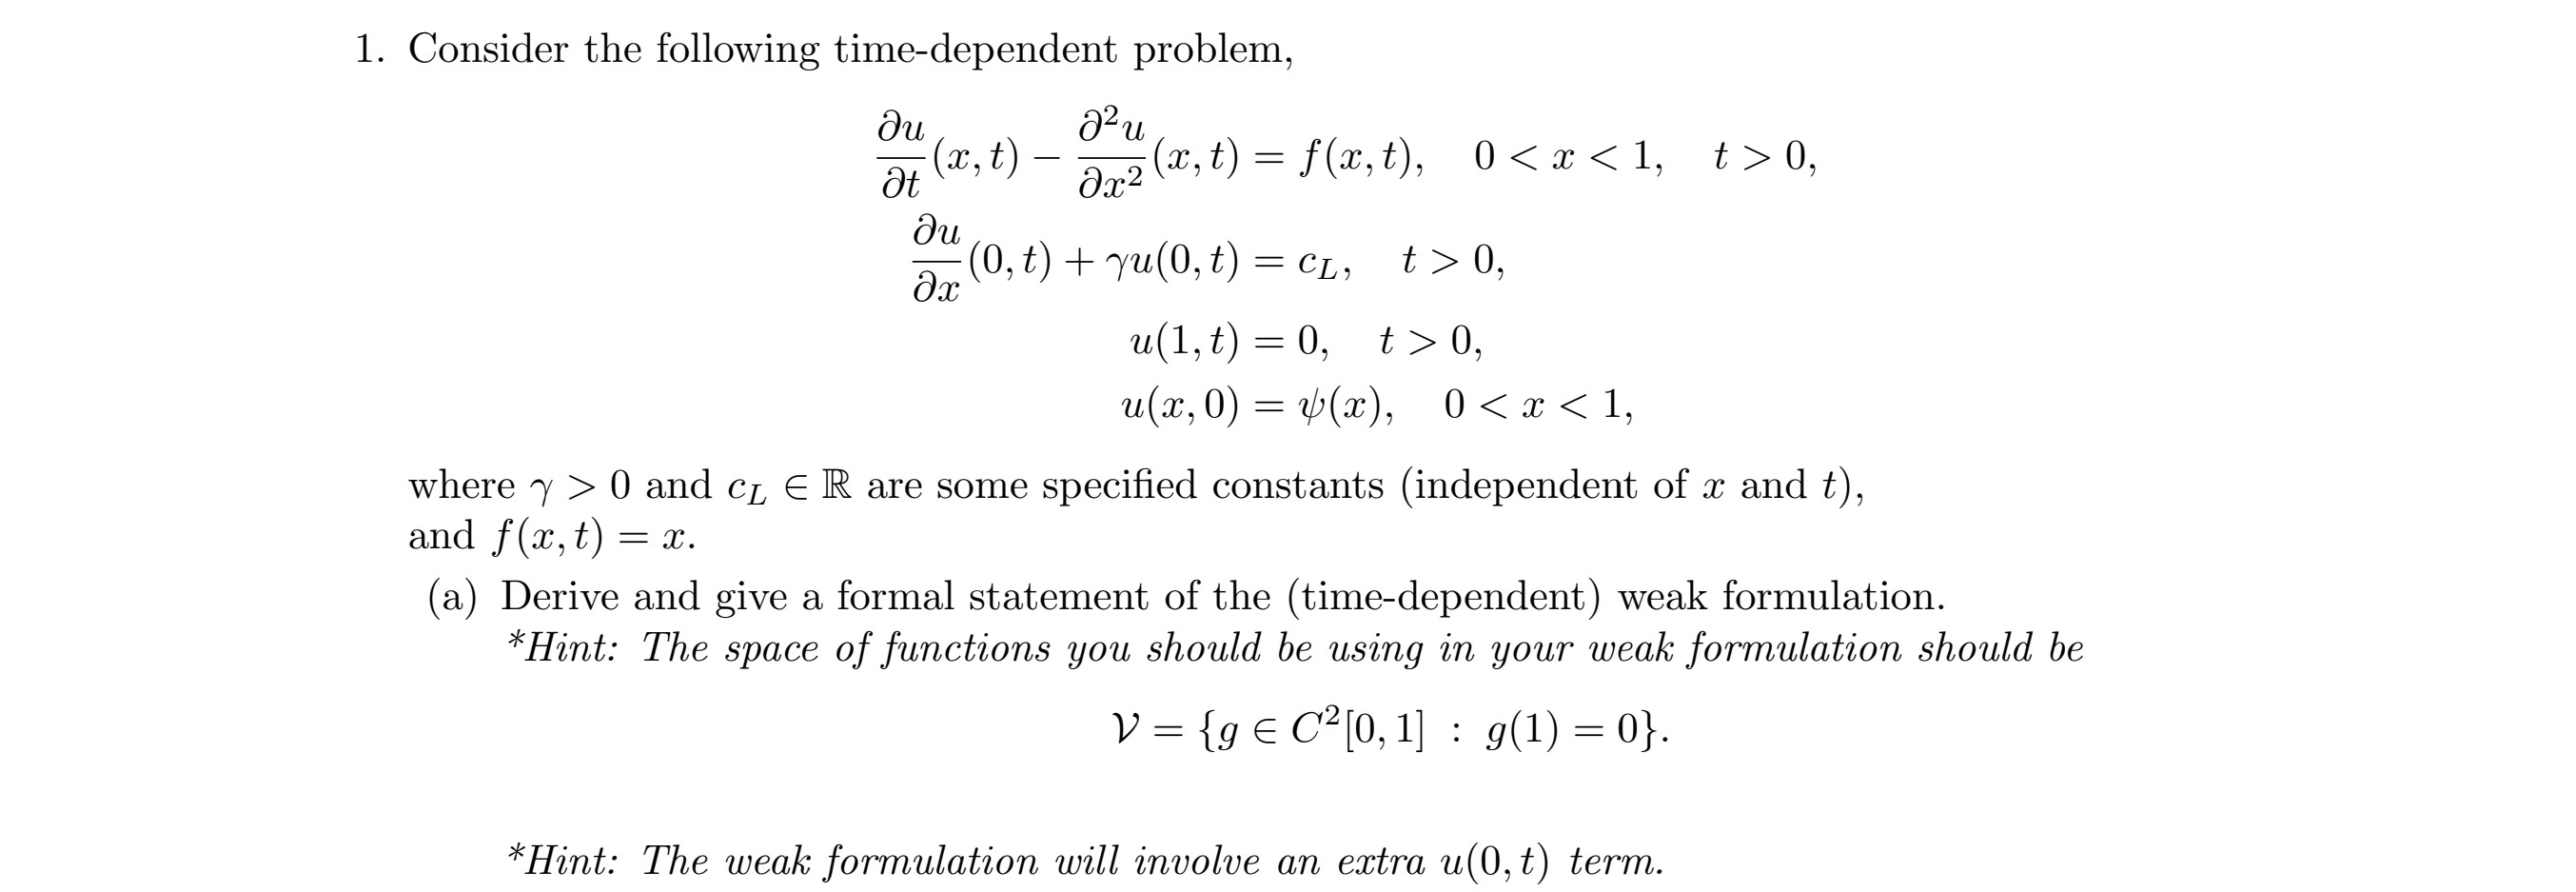

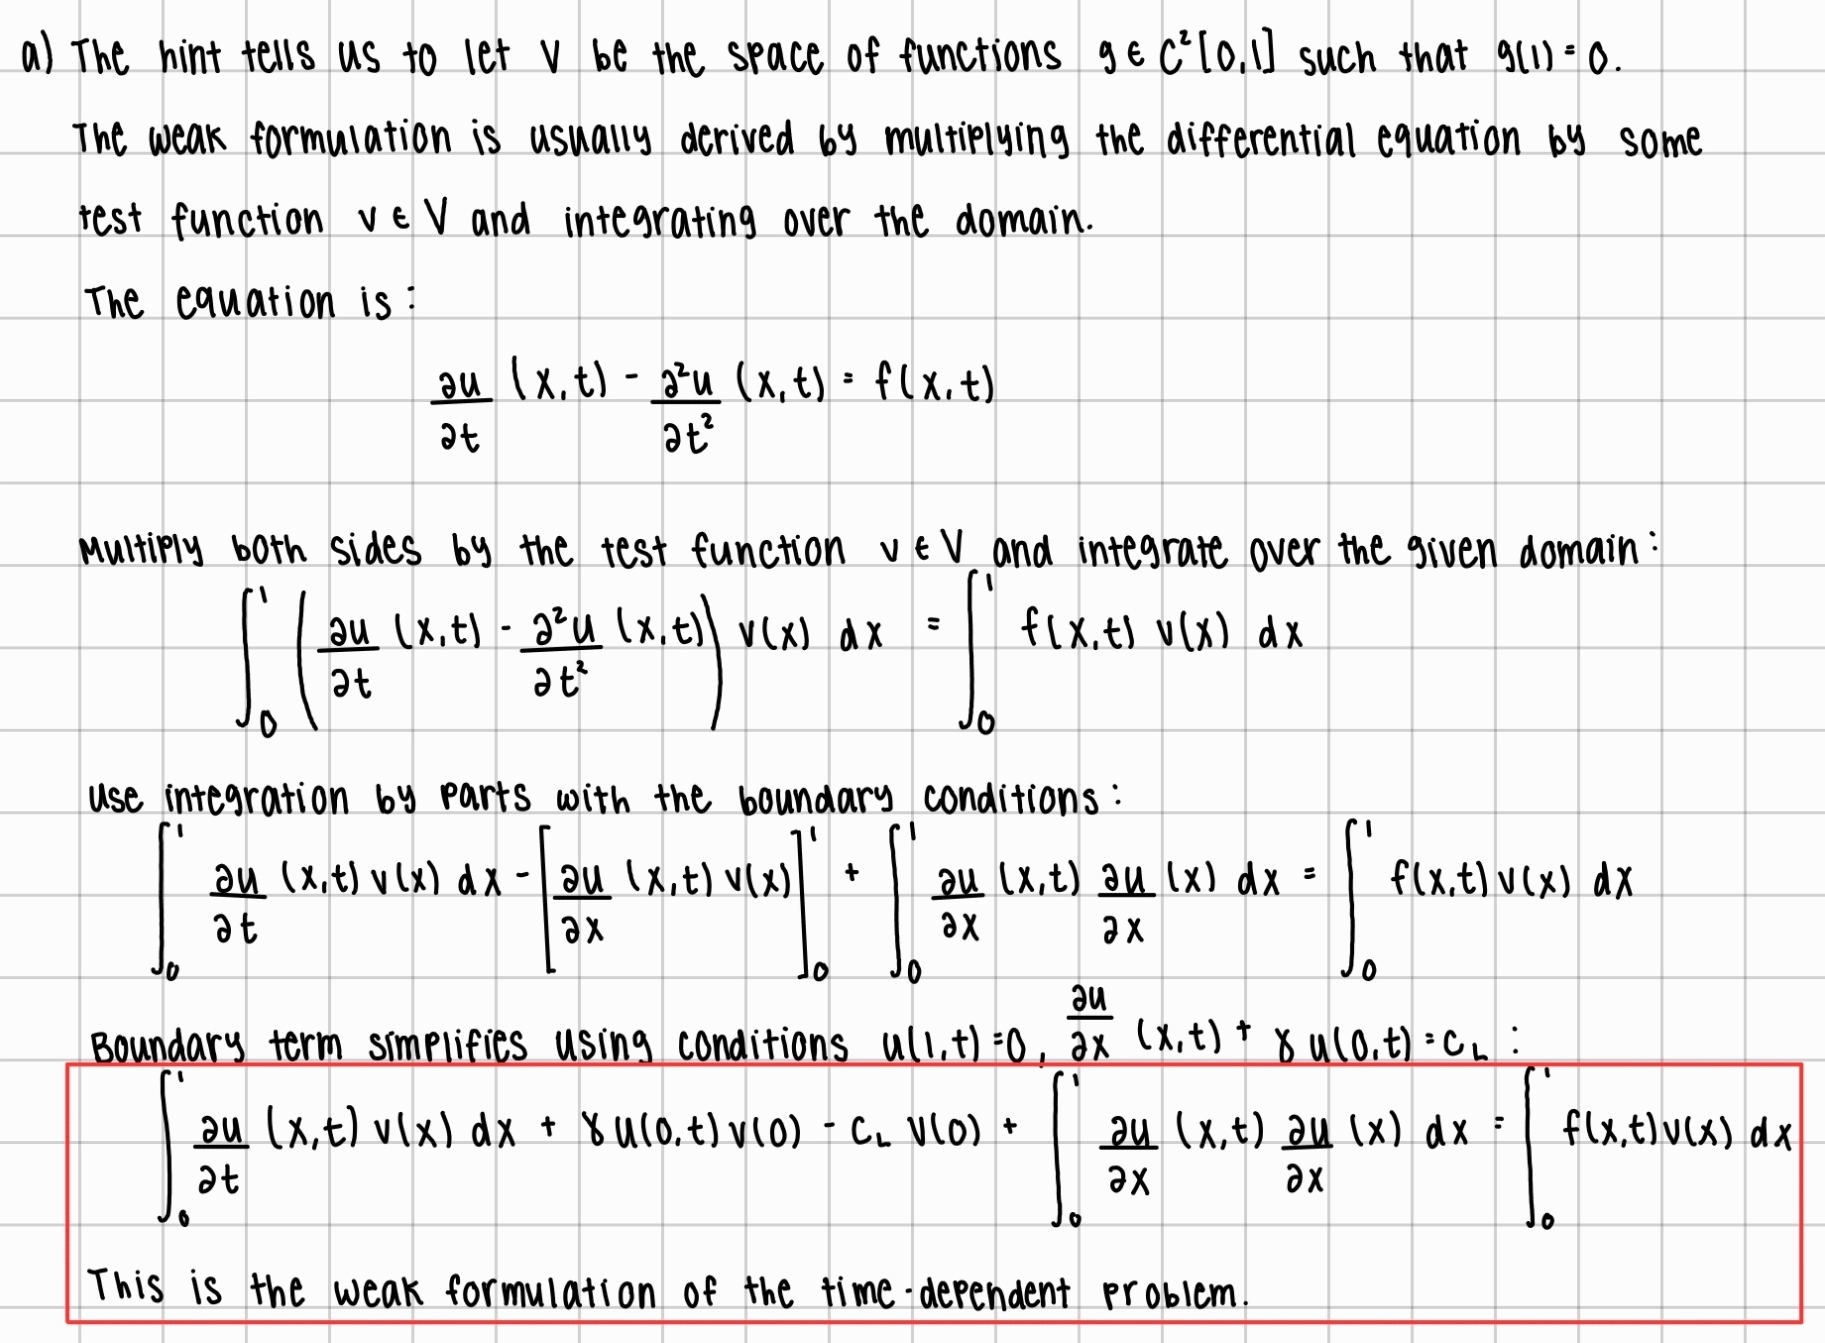

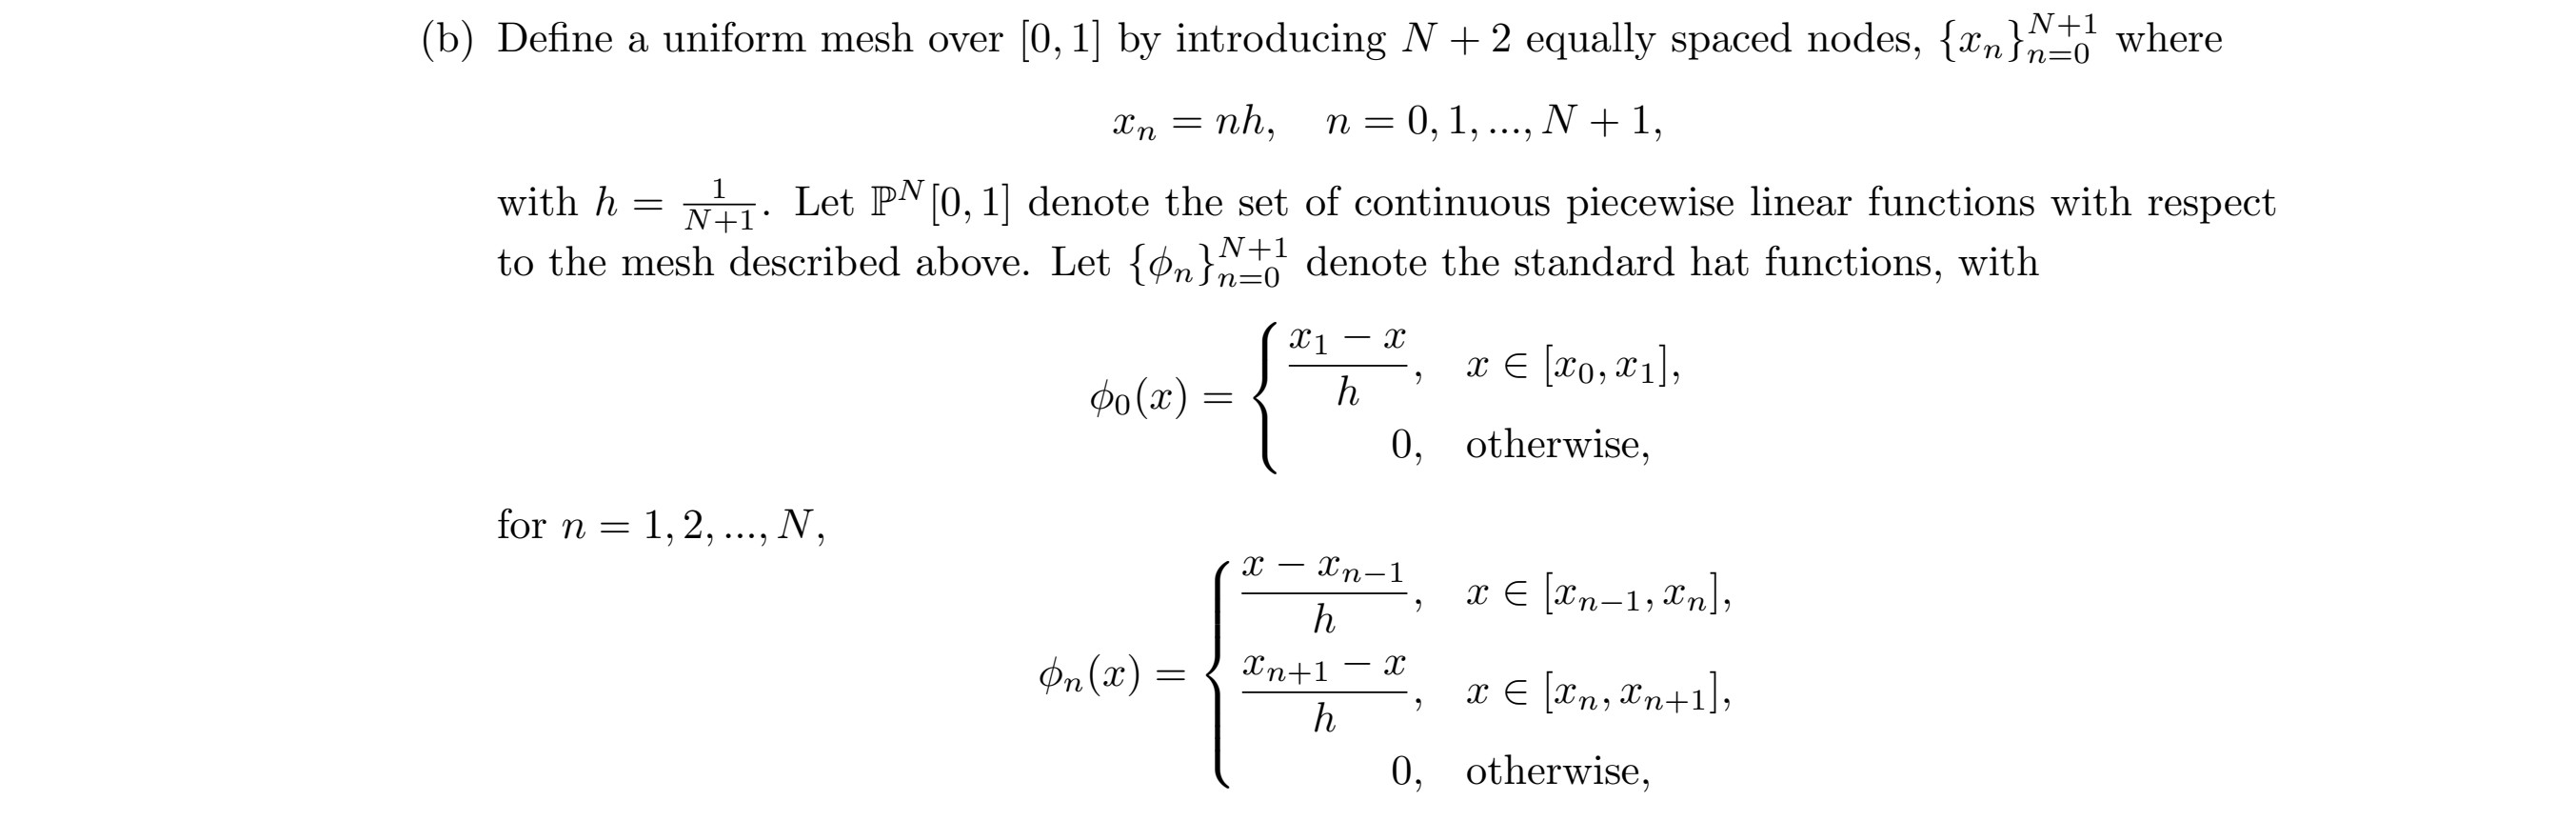

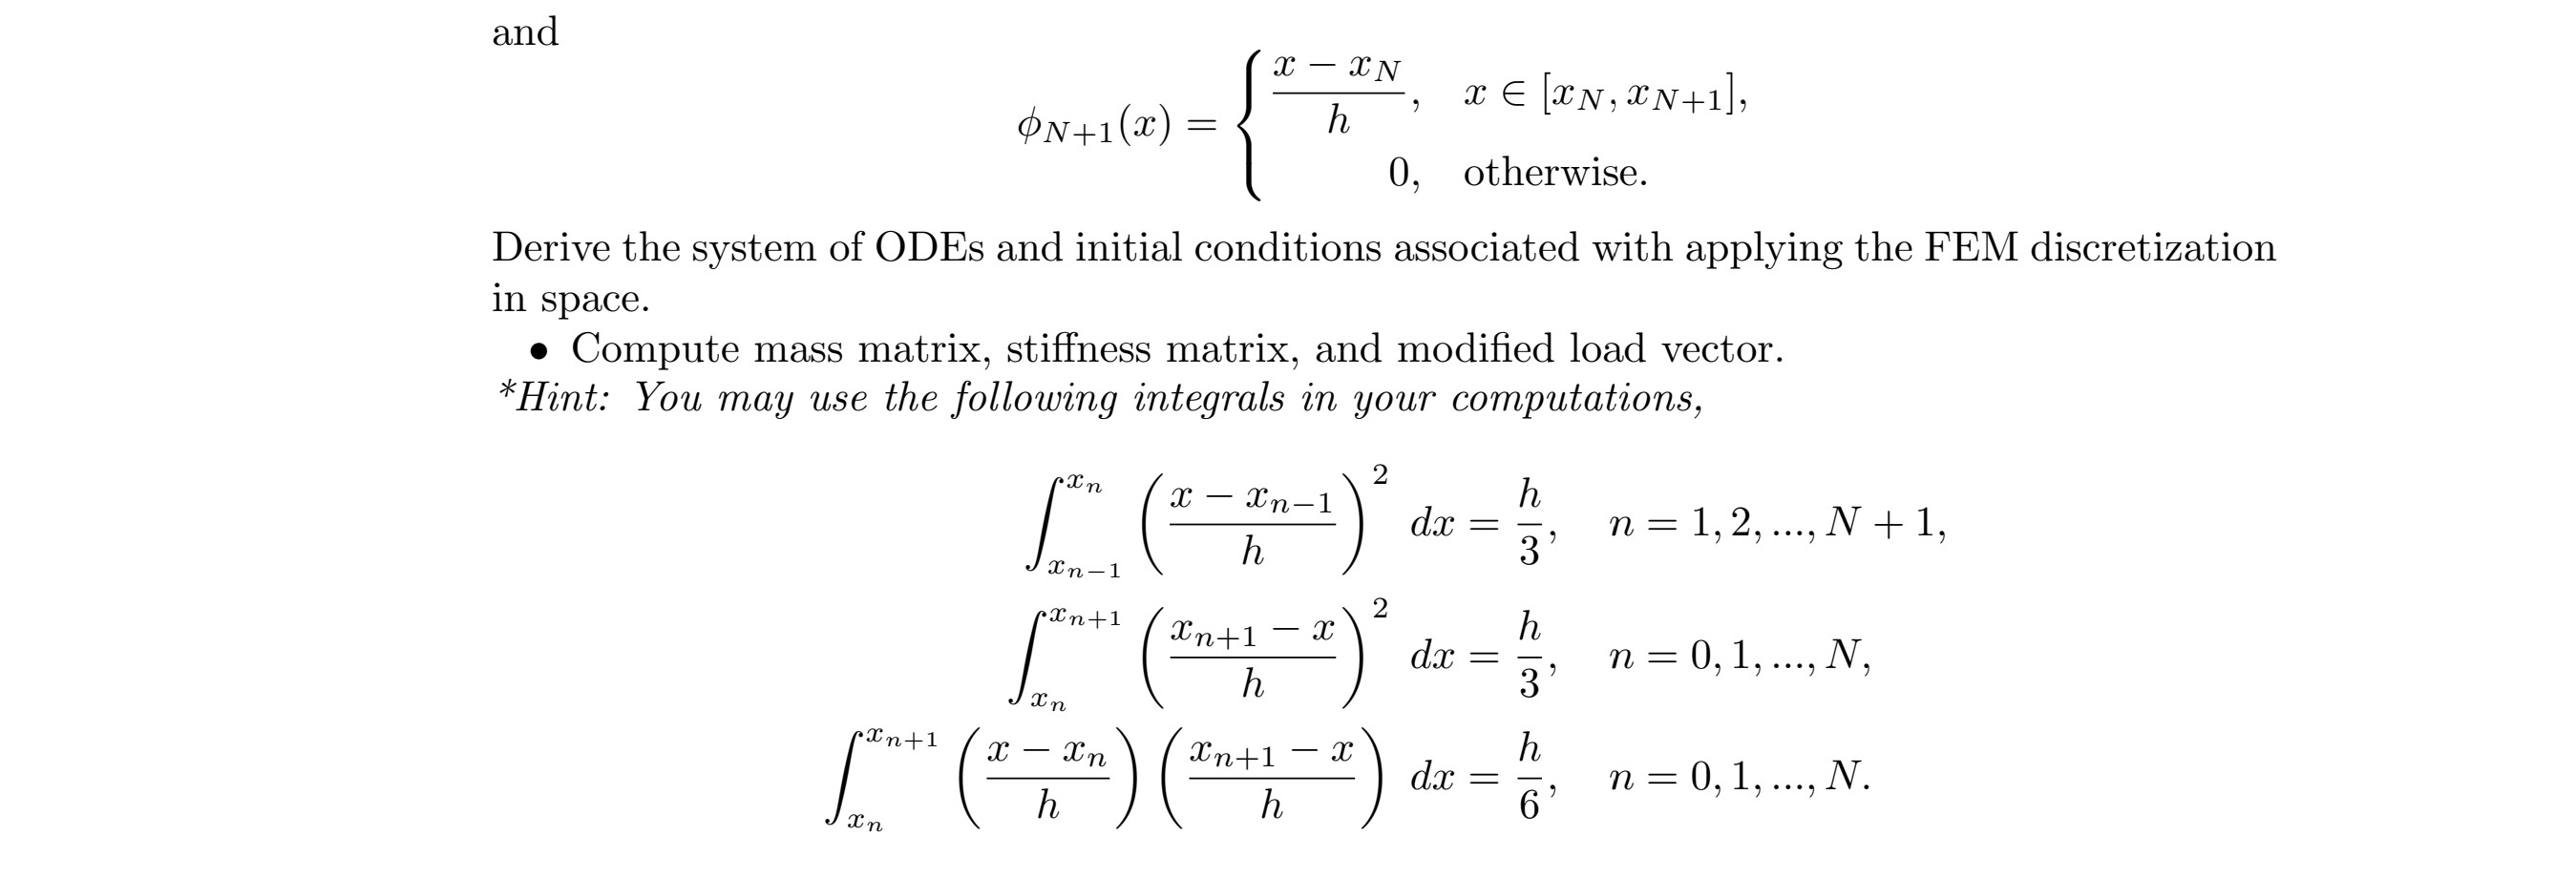

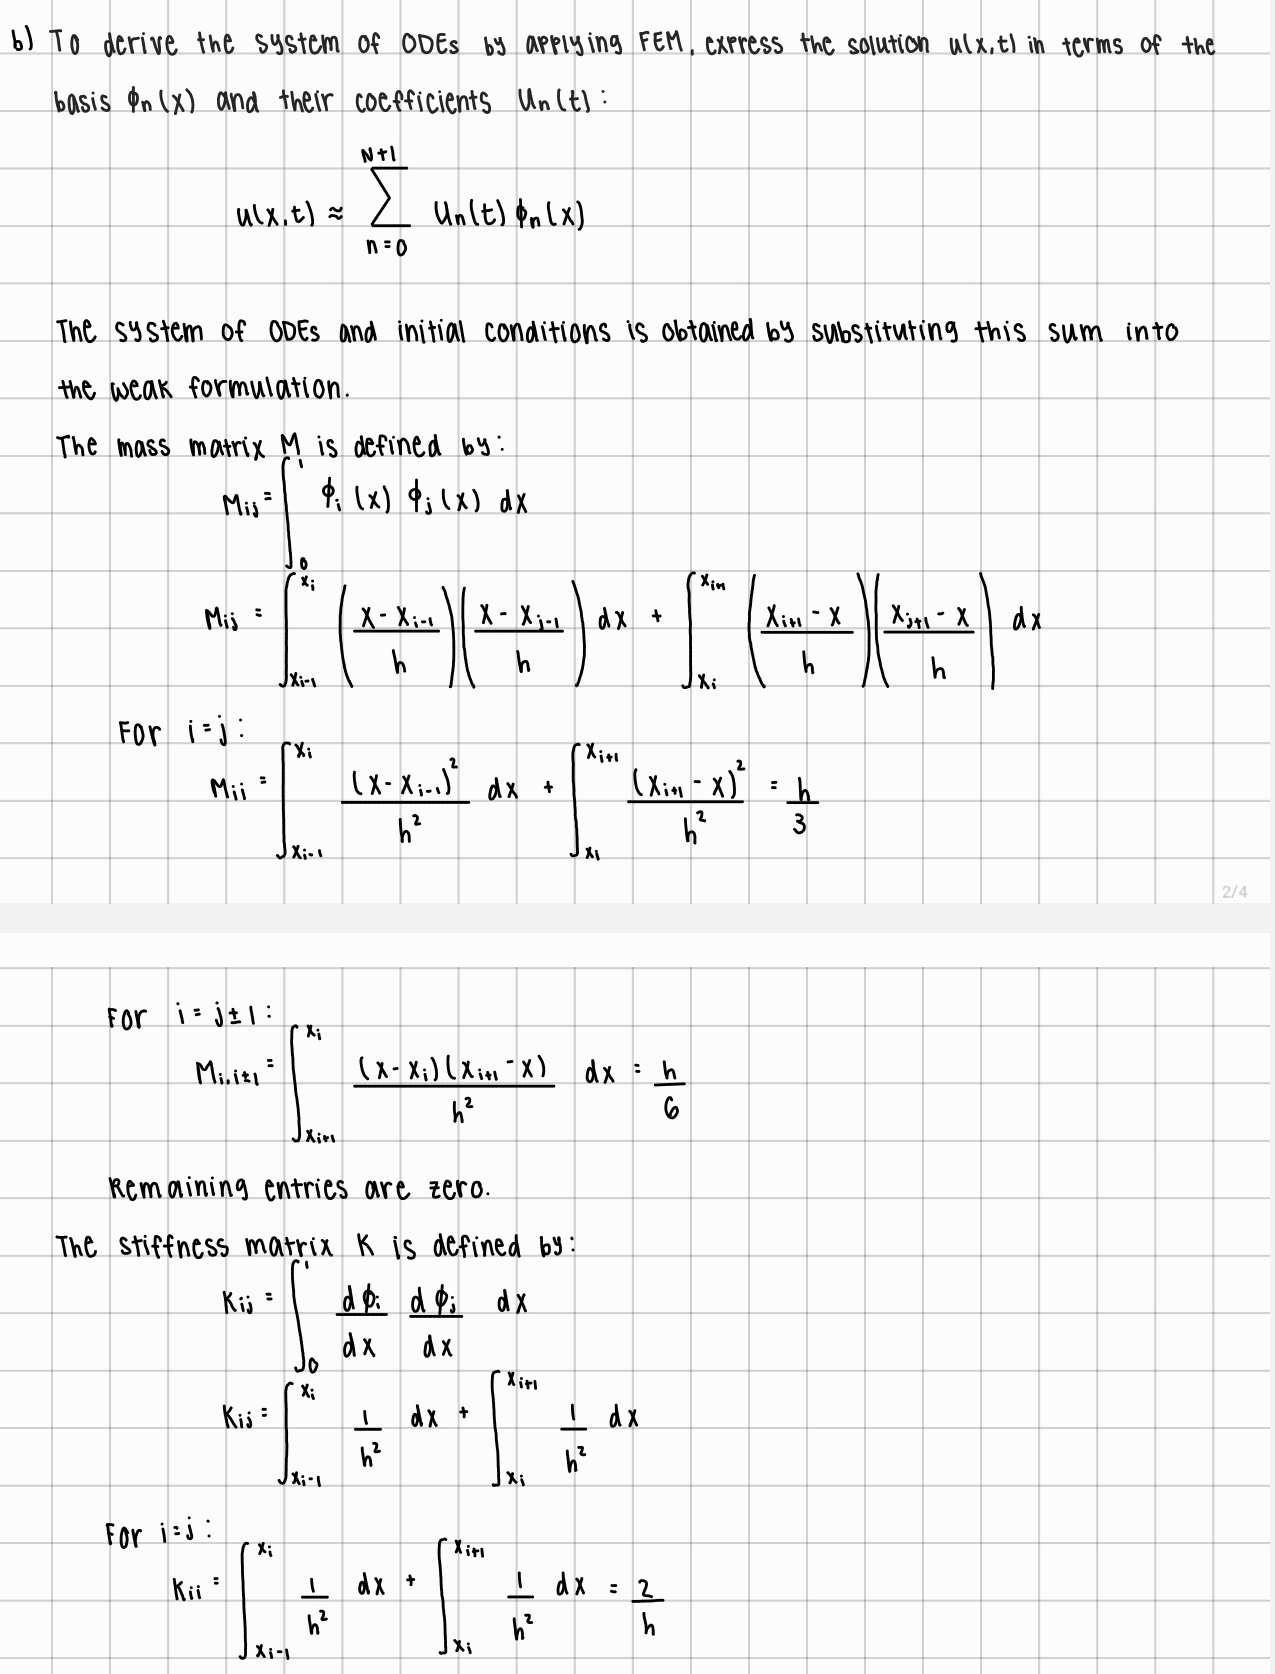

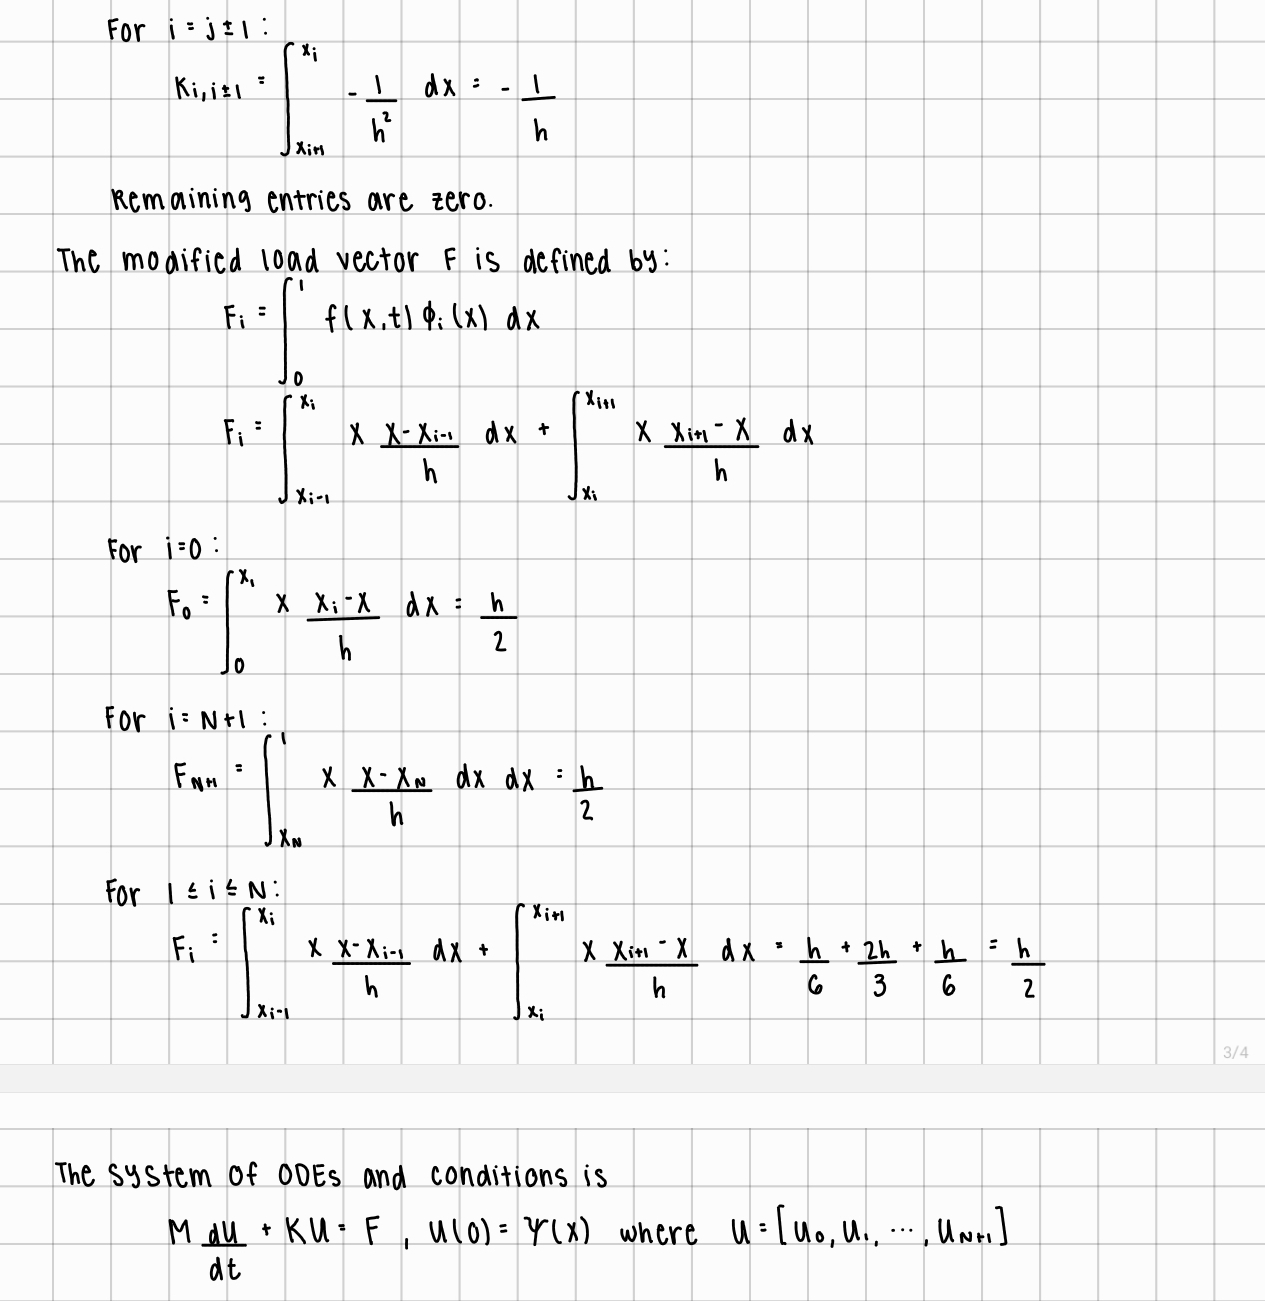

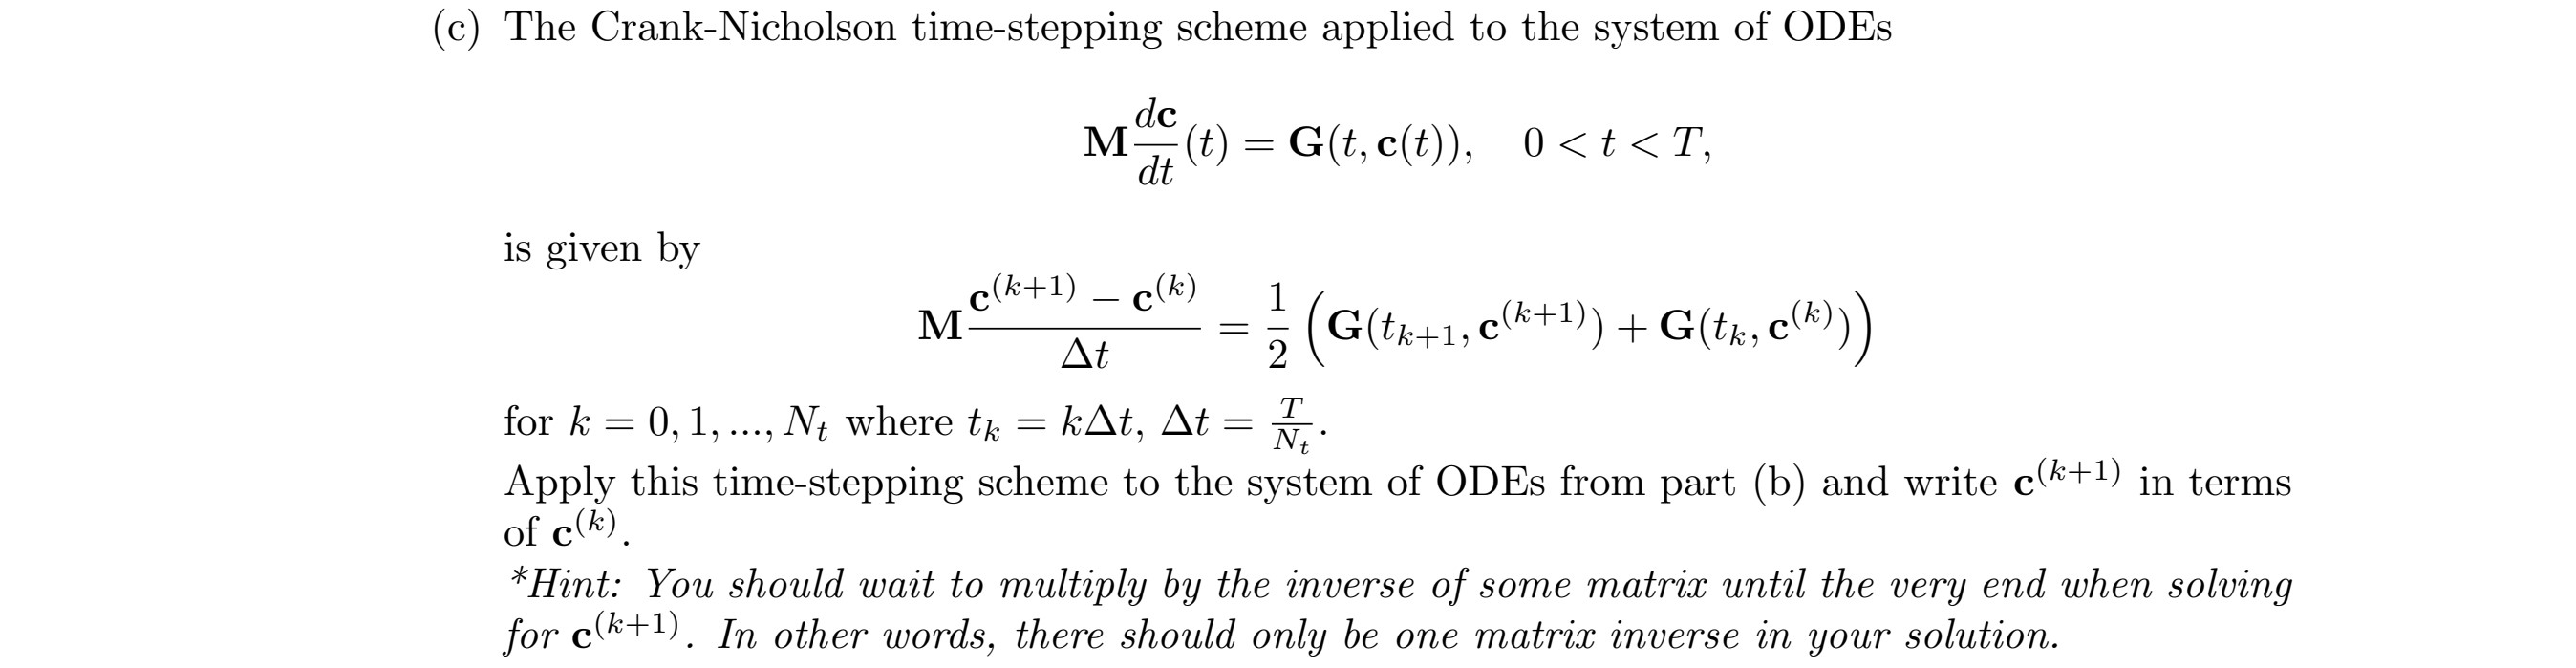

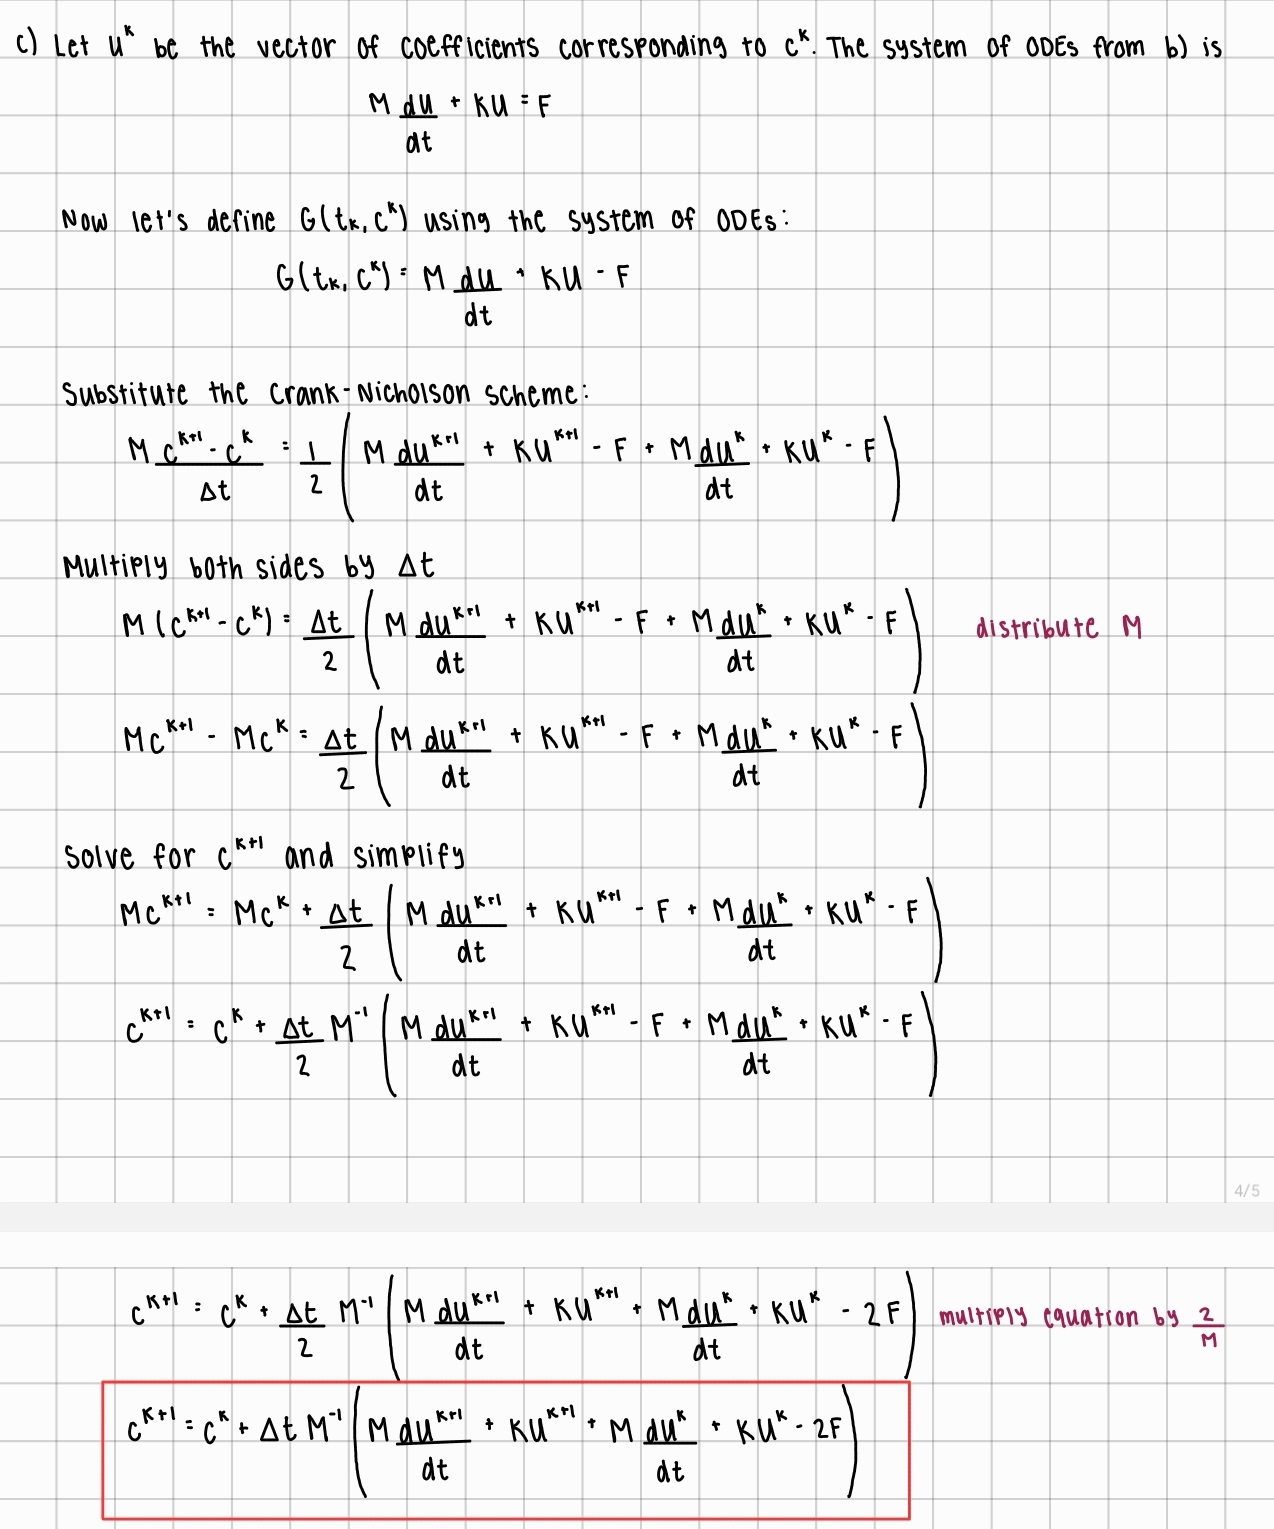

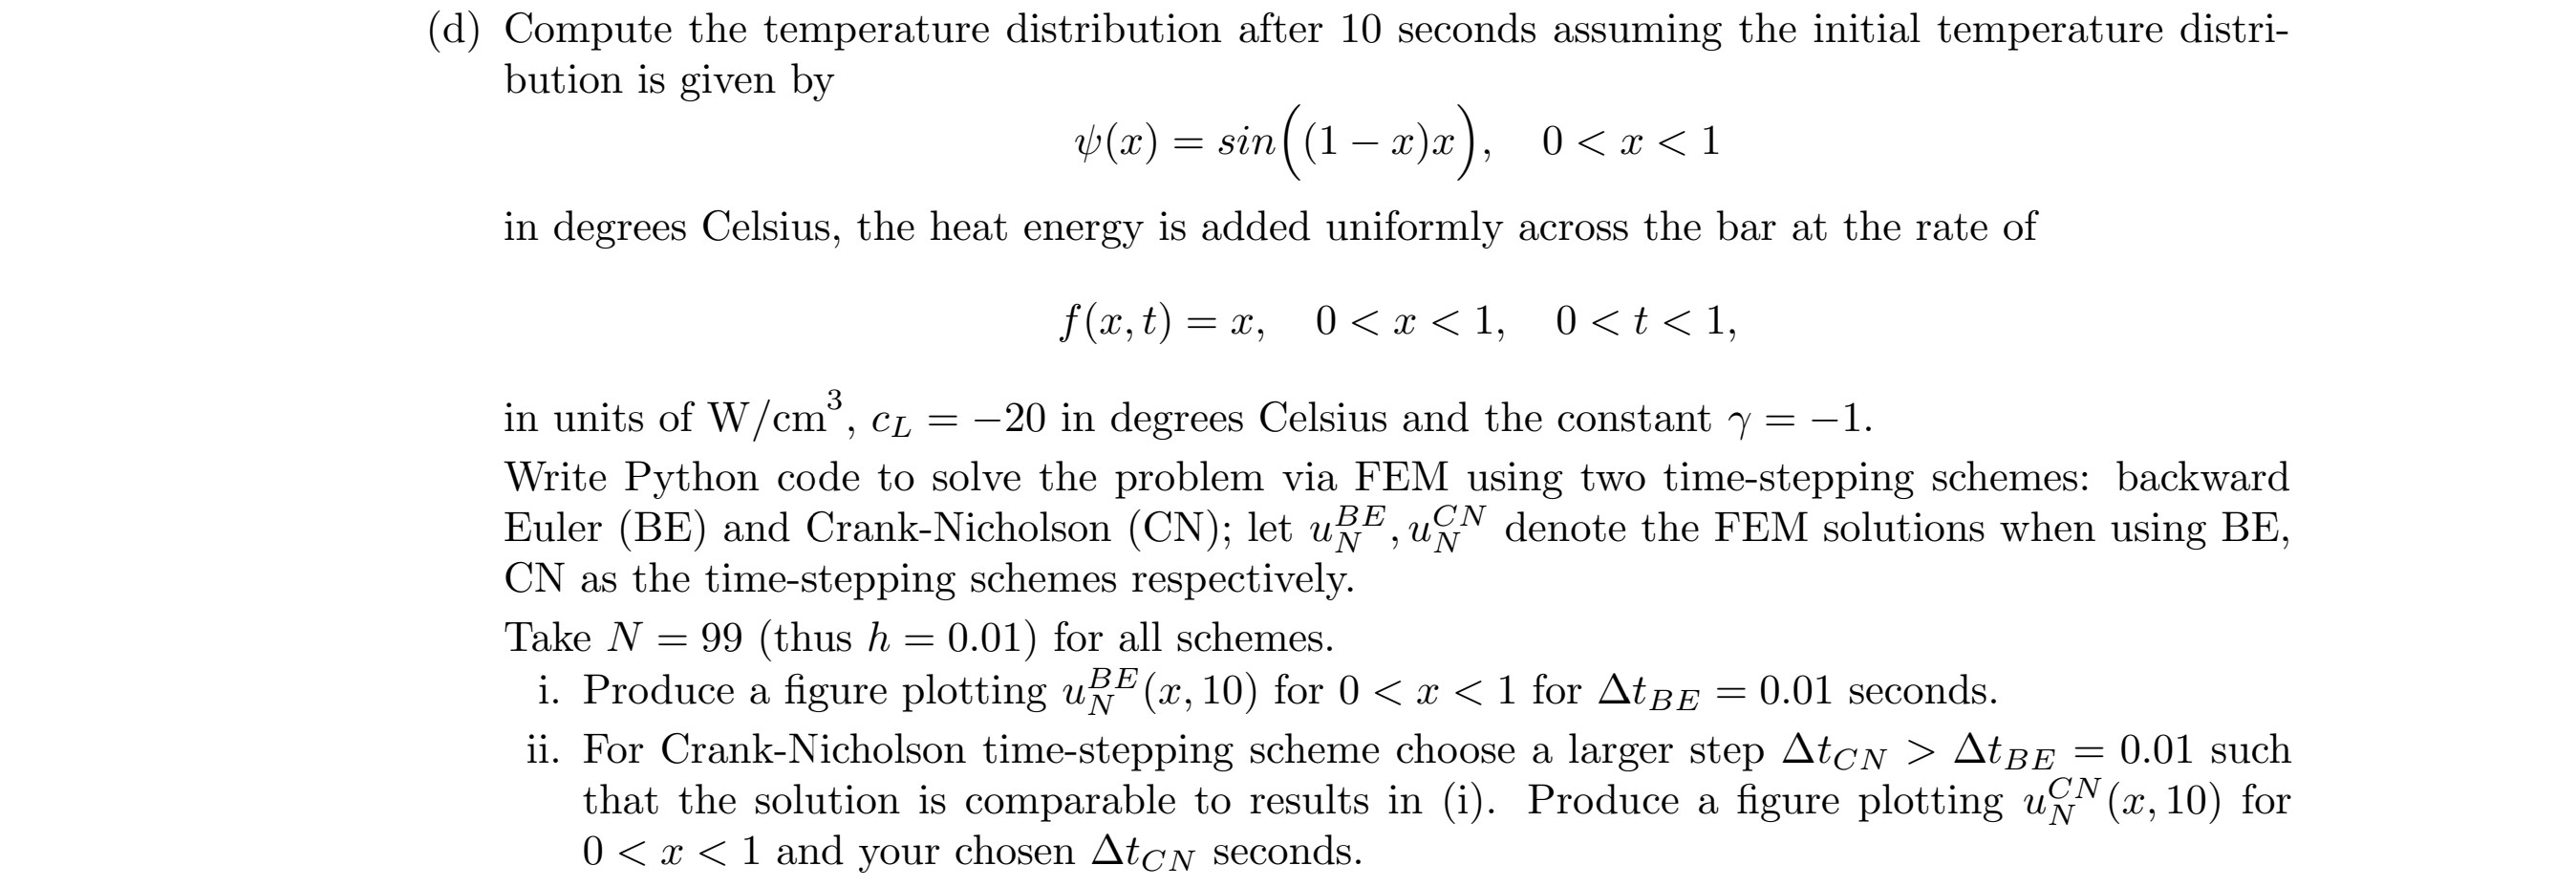

c:\Users\kiara\anaconda3\lib\site-packages\scipy\sparse\linalg\_dsolve\linsolve.py:168: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  warn('spsolve requires A be CSC or CSR matrix format',


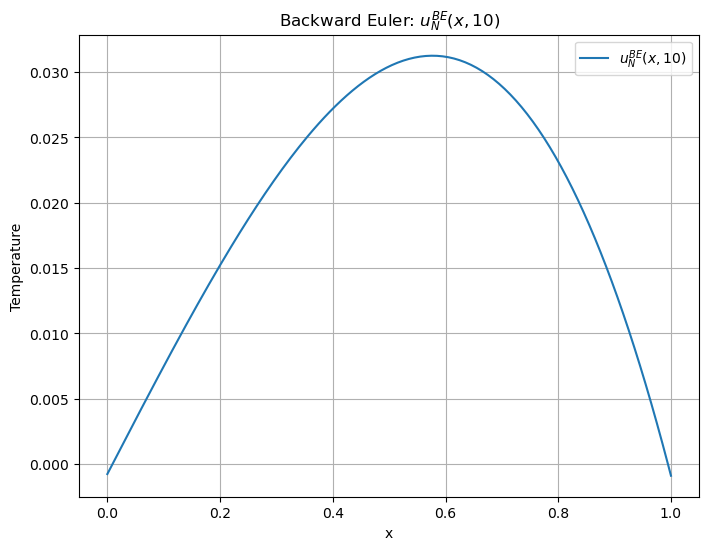

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import csr_matrix, eye
from scipy.sparse.linalg import spsolve

# Function to define the initial temperature distribution
def initial_temperature(x):
    return np.sin((1 - x) * x)

# Function to define the heat source term
def heat_source(x, t):
    return x

# Function to solve the FEM problem using backward Euler (BE)
def solve_BE(N, dt, T):
    h = 1 / (N + 1)
    nodes = np.linspace(0, 1, N + 2)

    M = np.zeros((N + 2, N + 2))
    K = np.zeros((N + 2, N + 2))
    F = np.zeros(N + 2)

    for i in range(1, N + 1):
        M[i, i - 1:i + 2] = [h / 6, 2 * h / 3, h / 6]
        K[i, i - 1:i + 2] = [-1 / h, 2 / h, -1 / h]
        F[i] = h / 2 * heat_source(nodes[i], 0)

    M_inv = np.linalg.pinv(M)  # Use pseudo-inverse instead of inverse
    A = M_inv @ (M / dt + K)

    u_BE = initial_temperature(nodes)

    for k in range(int(T / dt)):
        u_BE = spsolve(A, M_inv @ (M / dt @ u_BE + F))

    return u_BE

# Parameters
N = 199  # Increase the number of nodes
dt_BE = 0.01
T = 10

# Solve using Backward Euler
u_BE_N = solve_BE(N, dt_BE, T)

# Plot the solution for Backward Euler
plt.figure(figsize=(8, 6))
plt.plot(np.linspace(0, 1, N + 2), u_BE_N, label=r'$u^{BE}_N(x, 10)$')
plt.title('Backward Euler: $u^{BE}_N(x, 10)$')
plt.xlabel('x')
plt.ylabel('Temperature')
plt.legend()
plt.grid(True)
plt.show()


Invalid values in the solution at step 25


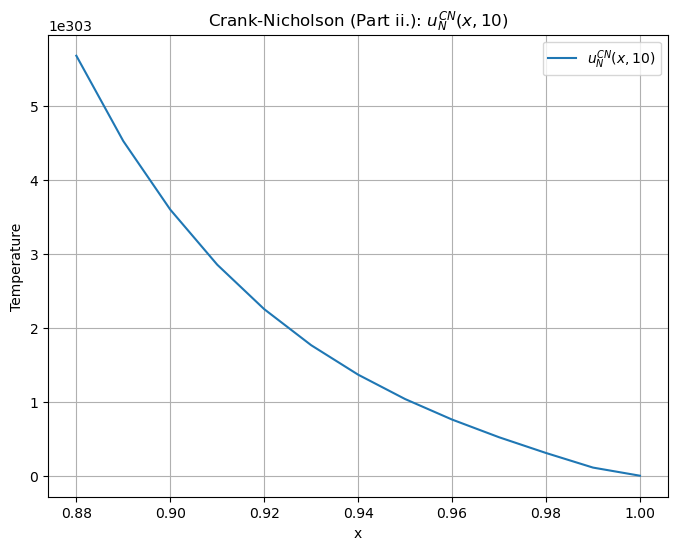

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse.linalg import spsolve
from numpy.linalg import solve

# Define the heat source function
def heat_source(x, t):
    return x

# Function to initialize the temperature distribution
def initial_temperature(x):
    return np.sin((1 - x) * x)

# Function to solve the FEM problem using Crank-Nicholson (CN)
def solve_CN(N, dt, T):
    h = 1 / (N + 1)
    nodes = np.linspace(0, 1, N + 2)

    M = np.zeros((N + 2, N + 2))
    K = np.zeros((N + 2, N + 2))
    F = np.zeros(N + 2)

    for i in range(1, N + 1):
        M[i, i - 1:i + 2] = [h / 6, 2 * h / 3, h / 6]
        K[i, i - 1:i + 2] = [-1 / h, 2 / h, -1 / h]
        F[i] = h / 2 * heat_source(nodes[i], 0)

    M_inv = np.linalg.pinv(M)  # Use pseudo-inverse instead of inverse
    A = M_inv @ (M / (2 * dt) + K)
    B = M_inv @ (M / (2 * dt) - K)

    # Initialize the temperature at t=0 using the initial condition
    u_CN = initial_temperature(nodes)
            
    for k in range(int(T / dt)):
        b = (M / (2 * dt) - K) @ u_CN + F + (M / (2 * dt) + K) @ u_CN

        # Set boundary conditions
        b[0] = 0  # Boundary condition at x=0
        b[-1] = 0  # Boundary condition at x=1

        try:
            u_CN = solve(A, B @ u_CN + b)
        except Exception as e:
            print(f"Error at step {k}: {e}")
            print("Matrices and vectors at this step:")
            print("A:\n", A)
            print("B:\n", B)
            print("u_CN:\n", u_CN)
            print("b:\n", b)
            break

        # Clip the solution to ensure non-negativity
        u_CN[u_CN < 0] = 0

        # Check for NaN or Inf in the solution
        if np.any(np.isnan(u_CN)) or np.any(np.isinf(u_CN)):
            print(f"Invalid values in the solution at step {k}")
            break

    return u_CN

# Parameters
N = 99  # Number of nodes
T = 10  # Total time
dt_CN_part_ii = 0.001  # Choose a smaller time step for part ii.

# Solve using Crank-Nicholson for part ii.
u_CN_N_part_ii = solve_CN(N, dt_CN_part_ii, T)

# Plot the solution for Crank-Nicholson in part ii.
plt.figure(figsize=(8, 6))
plt.plot(np.linspace(0, 1, N + 2), u_CN_N_part_ii, label=r'$u^{CN}_N(x, 10)$')
plt.title('Crank-Nicholson (Part ii.): $u^{CN}_N(x, 10)$')
plt.xlabel('x')
plt.ylabel('Temperature')
plt.legend()
plt.grid(True)
plt.show()